<a href="https://colab.research.google.com/github/rkloe5813/MS-Data-Science_Analytical-Methods/blob/main/Kloeckner_FinalProject_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## get libraries

In [71]:
import pandas as pd
import numpy as np

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
import seaborn as sns

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
!pip install category_encoders

## get data

In [76]:
url = pd.read_csv('https://raw.githubusercontent.com/rkloe5813/data-science-projects/main/projectTestTrainData.csv')

In [77]:
url.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
url.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9001.00000,9.001000e+03,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,4501.00000,1.569091e+07,650.129763,38.929230,5.006444,76418.468026,1.531608,0.702366,0.513499,100202.711437,0.206422
std,2598.50922,7.185523e+04,96.808262,10.454079,2.887976,62453.340081,0.582071,0.457243,0.499846,57495.310987,0.404759
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2251.00000,1.562870e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51016.020000,0.000000
50%,4501.00000,1.569096e+07,651.000000,37.000000,5.000000,97331.190000,1.000000,1.000000,1.000000,100442.220000,0.000000
75%,6751.00000,1.575309e+07,717.000000,44.000000,7.000000,127649.640000,2.000000,1.000000,1.000000,149401.330000,0.000000
max,9001.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [79]:
url.shape

(9001, 14)

In [80]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9001 non-null   int64  
 1   CustomerId       9001 non-null   int64  
 2   Surname          9001 non-null   object 
 3   CreditScore      9001 non-null   int64  
 4   Geography        9001 non-null   object 
 5   Gender           9001 non-null   object 
 6   Age              9001 non-null   int64  
 7   Tenure           9001 non-null   int64  
 8   Balance          9001 non-null   float64
 9   NumOfProducts    9001 non-null   int64  
 10  HasCrCard        9001 non-null   int64  
 11  IsActiveMember   9001 non-null   int64  
 12  EstimatedSalary  9001 non-null   float64
 13  Exited           9001 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 984.6+ KB


### basic info about data



*   RowNumber --> discard --> useless index
*   CustomerId --> discard --> no modeling value
*   Surname --> discard --> no modeling value
*   CreditScore --> key variable; continuous --> start by understanding distribution
*   Geography --> categorical variable; need to understand unique values to decide what to do with it
*   Gender --> probably binary variable; likely important for predicting churn
*   Age --> continuous variable --> understand distribution
*   Tenure --> unclear what that means --> take a look
*   Balance --> unclear what that means --> take a look
*   NumOfProducts --> discrete numeric variable --> likely important for churn prediction
*   HasCrCard --> probably binary variable --> likely important for churn prediction
*   IsActiveMember --> strange: if we are supposed to predict churn, then a user who is not an active member has factually already churned --> probably issues of multicollinearity --> need to take a look
*   EstimatedSalary --> continuous variable --> likely important for churn prediction
* **Exited --> target variable/label (classification)**



## basic cleaning

### get rid of clearly useless columns

In [81]:
url.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [82]:
url.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
url.shape

(9001, 11)

### binning of age variable

In [84]:
# create labels for the bins
labels = ['twenties', 'youngThirties', 'highThirties', 'middleAged','elderly']
url['quantile_Age'] = pd.qcut(url['Age'], q=5, precision=0, labels = labels)
# url['bin_qcut'] = url.qcut(url['Age'], q=3, precision=1, labels=labels)


In [85]:
url.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,quantile_Age
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,middleAged
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,middleAged
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,middleAged
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,highThirties
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,middleAged


In [86]:
url['quantile_Age'].value_counts(sort=False)

twenties         2128
youngThirties    1606
highThirties     2021
middleAged       1544
elderly          1702
Name: quantile_Age, dtype: int64

In [87]:
#get rid of age variable since we now have binned Age
# url.drop(['Age'], axis=1, inplace=True)
# url.head()

*decided not to get rid of 'Age' because multiple iterations of modeling showed its value*

### separate out continuous variables

In [88]:
contVar = url[['CreditScore','Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']]

In [89]:
type(contVar)

pandas.core.frame.DataFrame

In [90]:
contVar

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
8996,615,32,5,138521.83,1,56897.10
8997,710,33,2,0.00,2,72945.32
8998,674,38,10,83727.68,1,45418.12
8999,702,38,9,0.00,2,158527.45


### basic visuals for intuition

### continuous variables

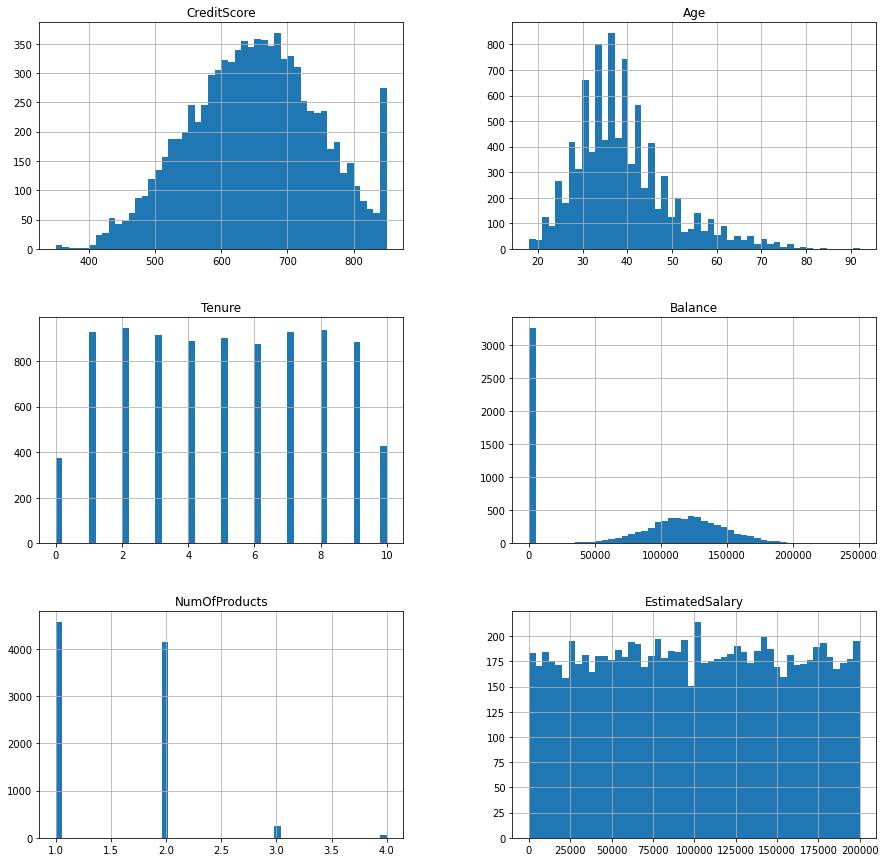

In [91]:
contVar.hist(bins=50,figsize=(15,15))
plt.show();

#### basic info about continuous variables



*   CreditScore --> slightly left skewed distribution, but not too bad; outlier in the mid 800s, otherwise, nicely centered in the high 600; no concerns for modeling
*   Age --> heavily right skewed distribution; strongly centered in the high 30s --> might benefit from some normalization
*   Tenure --> almost uniform distribution between 1 and 9 with some outliers below and above that
*   Balance --> beautiful bell shape, centered around 125,000; except for the higher number of people with 0 balance (3x of what the median count is) --> will require some data wrangling
*   NumOfProducts --> almost identical number of people have 1 or 2 products, and then single digits have 3 or 4. --> curious to see if those few people with 3 or 4 tend to churn less --> if so, might indicate a potential level for management recommendation
*   EstimatedSalary --> almost uniform distribution between 25,000 and 200,000. --> strange because one might expect closer alignment of salary and account balance, but they have very different distributions --> worth a deeper look


### categorical variables

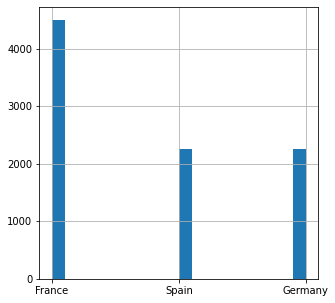

In [92]:
url['Geography'].hist(bins=20,figsize=(5,5))
plt.show();

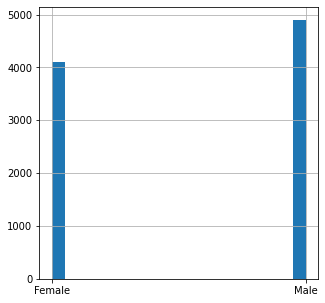

In [93]:
url['Gender'].hist(bins=20,figsize=(5,5))
plt.show();

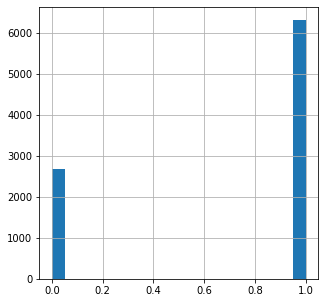

In [94]:
url['HasCrCard'].hist(bins=20,figsize=(5,5))
plt.show();

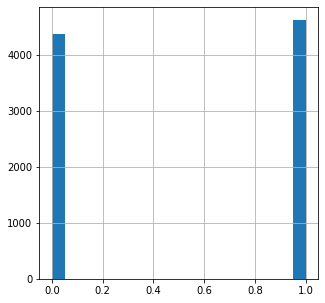

In [95]:
url['IsActiveMember'].hist(bins=20,figsize=(5,5))
plt.show();

#### basic info about categorical variables



*   Geography --> 3 countries: France, Spain, Germany with Spain taking about half the customers and Spain and Germany each one quarter --> should be made dummies
*   Gender: slightly more men than women --> make a numeric binary variable
*   HasCrCard: more than twice as many people have a credit card than not; already coded up as binary --> keep as is
*   IsAcctiveMember --> fairly evenly split; already binary numeric; still need to look at relation to target variable, otherwise, fine as is

### target variable

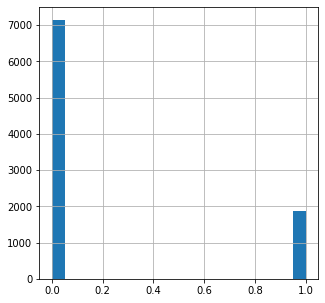

In [96]:
url['Exited'].hist(bins=20,figsize=(5,5))
plt.show();

#### basic info about target variable



*   Exited --> binary, numeric: fairly imbalanced: almost 80% of people have exited = 0 (meaning, they have not left yet) --> might need to consider balancing the dataset through SMOTE; but only after splitting into train and test

In [97]:
url.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,quantile_Age
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,middleAged
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,middleAged
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,middleAged
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,highThirties
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,middleAged


### Basic feature engineering

In [98]:
#Check the number of unique classes
cat_cols = url.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(url[col].nunique())
    # print('--------------------------')

Number of classes in Geography
3
Number of classes in Gender
2
Number of classes in quantile_Age
5


In [99]:
import category_encoders as ce

#Label encoding
cat_cols = ['Geography', 'Gender','quantile_Age'] 

# ordinal_encoder = ce.OrdinalEncoder(cols=cat_cols)
cat_encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True, return_df=True)

url = cat_encoder.fit_transform(url)

In [100]:
url.head()

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,quantile_Age_twenties,quantile_Age_youngThirties,quantile_Age_highThirties,quantile_Age_middleAged,quantile_Age_elderly
0,619,1,0,0,1,0,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0
1,608,0,1,0,1,0,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,0
3,699,1,0,0,1,0,39,1,0.00,2,0,0,93826.63,0,0,0,1,0,0
4,850,0,1,0,1,0,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,0


#DataPrep

In [101]:
!pip install dataprep

In [102]:
from dataprep.eda import create_report

In [103]:
report = create_report(url)

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'quantile_Age_...ies'


In [104]:
report.show_browser()

In [105]:
report.save(filename='dataprepReport3')

Report has been saved to /content/dataprepReport3.html!


# Correlation Heatmap

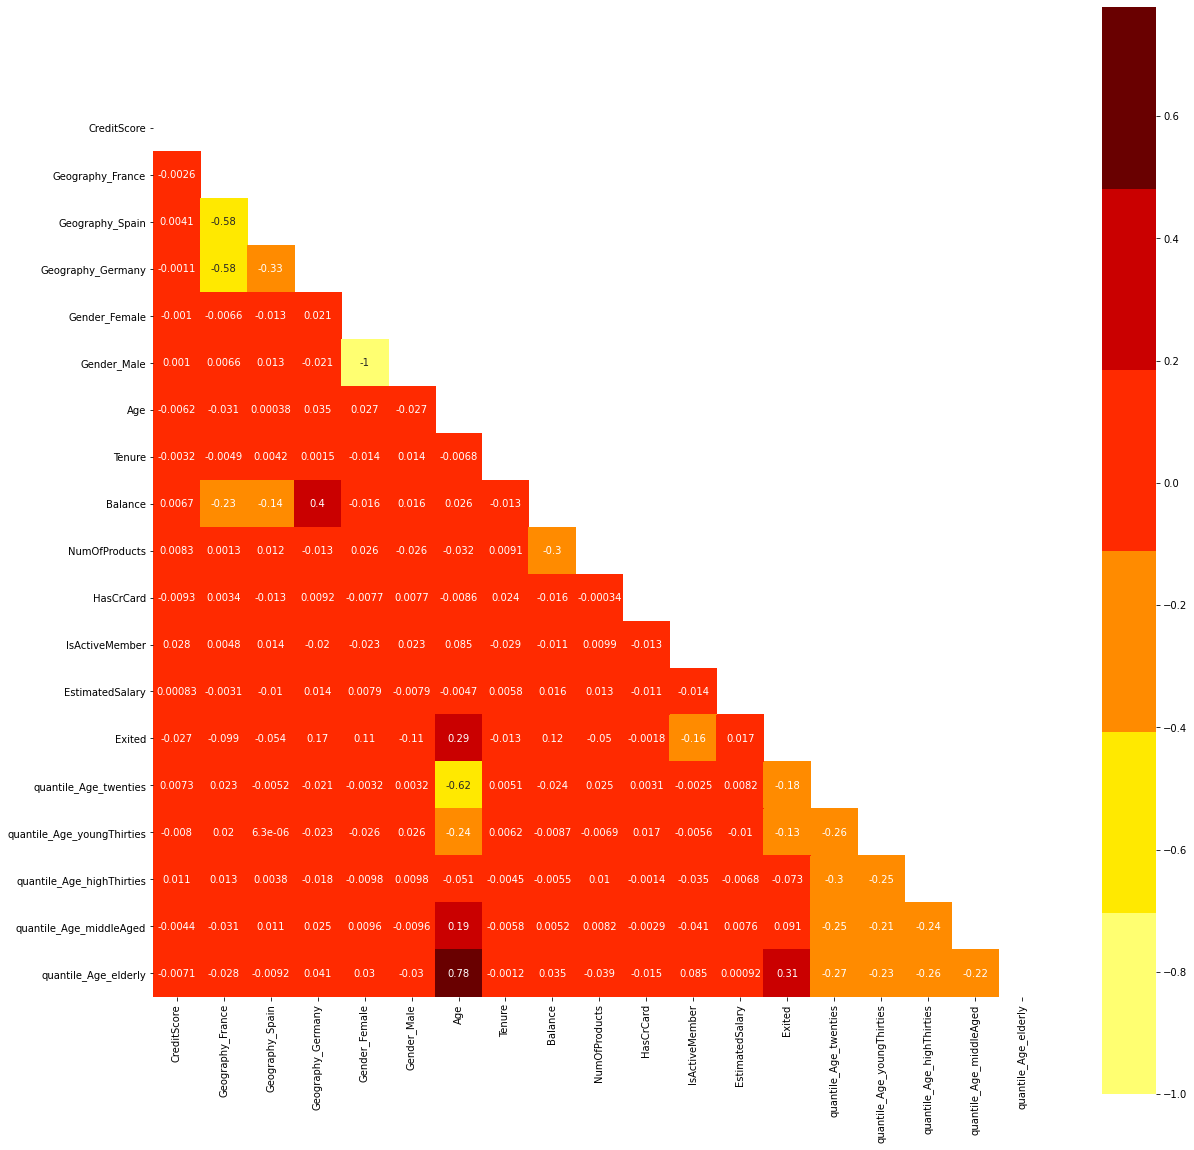

In [106]:
def heatmap_corr(dataframe):
    # Plots a heatmap of correlation between features with masking.
    fig, ax = plt.subplots(figsize=(20,20))
    mask=np.zeros_like(dataframe.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    color_map = sns.color_palette("hot_r")
    ax = sns.heatmap(dataframe.corr(), cmap = color_map, mask=mask, square=True, annot=True)
heatmap_corr(url)

# Separate Target and Features

In [107]:
X = url.drop('Exited', axis=1)
y = url['Exited']
y = pd.DataFrame(y)

# Split Train and Test

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [110]:
print(f"Training set shape (rows, cols): " , X_train.shape)
print(f"Test set shape (rows, cols): " , X_test.shape)
print(f"Training target shape (rows, cols): " , y_train.shape)
print(f"Test target shape (rows, cols): " , y_test.shape)

Training set shape (rows, cols):  (7200, 18)
Test set shape (rows, cols):  (1801, 18)
Training target shape (rows, cols):  (7200, 1)
Test target shape (rows, cols):  (1801, 1)


*now that train and test have been split, it's time for resampling*

# Balancing the Classes (Resampling = Oversampling using SMOTE)

In [111]:
print('\nDistribution of target variable "Exited" in train set :')
print(y_train.Exited.value_counts()/y_train.Exited.count());


Distribution of target variable "Exited" in train set :
0    0.795972
1    0.204028
Name: Exited, dtype: float64


In [112]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [113]:
X_train_SMOTE_DF = pd.DataFrame(X_train_SMOTE, columns=X.columns)

In [114]:
X_train_SMOTE_DF.head()

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,quantile_Age_twenties,quantile_Age_youngThirties,quantile_Age_highThirties,quantile_Age_middleAged,quantile_Age_elderly
0,601.0,1.0,0.0,0.0,0.0,1.0,40.0,10.0,127847.86,1.0,0.0,0.0,173245.68,0.0,0.0,1.0,0.0,0.0
1,595.0,1.0,0.0,0.0,0.0,1.0,52.0,9.0,0.00,1.0,1.0,1.0,106340.66,0.0,0.0,0.0,0.0,1.0
2,489.0,1.0,0.0,0.0,1.0,0.0,38.0,5.0,117289.92,1.0,0.0,0.0,85231.88,0.0,0.0,1.0,0.0,0.0
3,640.0,0.0,1.0,0.0,1.0,0.0,32.0,6.0,118879.35,2.0,1.0,1.0,19131.71,0.0,1.0,0.0,0.0,0.0
4,598.0,0.0,1.0,0.0,1.0,0.0,64.0,1.0,62979.93,1.0,1.0,1.0,152273.57,0.0,0.0,0.0,0.0,1.0


In [115]:
y_train_SMOTE_DF = pd.DataFrame(y_train_SMOTE,columns=y.columns)

In [116]:
y_train_SMOTE_DF

,Exited
0,0
1,1
2,0
3,0
4,0
...,...
11457,1
11458,1
11459,1
11460,1


In [117]:
# recombine the upsampled minority class with the majority class  
Training_upsampled = pd.concat([X_train_SMOTE_DF, y_train_SMOTE_DF])

In [118]:
print(Training_upsampled.groupby('Exited').size())

Exited
0.0    5731
1.0    5731
dtype: int64


# Running Models as Baseline

In [119]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pprint

#### do some upfront scaling for SMOTE

In [120]:
scaler = StandardScaler()  
scaler.fit(X_train_SMOTE)
X_train_SMOTE_scaled = pd.DataFrame(scaler.transform(X_train_SMOTE), columns=X.columns) 
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### do some upfront scaling without SMOTE

In [121]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns) 
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### helper functions for modeling efficiency

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from matplotlib.ticker import IndexLocator
import itertools
from scipy import stats
import pprint
from sklearn.linear_model import LogisticRegression

In [123]:
def plot_cm(y_test,y_pred_class,classes=['Exited','Stayed']):
    
    fig, ax = plt.subplots()
    cm = confusion_matrix(y_test, y_pred_class)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    plt.title("Confusion Matrix")
    ax.set(yticks=[-0.5, 1.5], 
           xticks=[0, 1], 
           yticklabels=classes, 
           xticklabels=classes)
    ax.yaxis.set_major_locator(IndexLocator(base=1, offset=0.5))
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [124]:
def plot_auc(y_test, y_pred_class, classes = ['Exited','Stayed']):
  plt.plot(fpr, tpr, linestyle='--',color='blue', label='Logistic Regression')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

## Logistic Regression

In [125]:
def logiRegr(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    logreg = LogisticRegression(random_state=1,**kwargs)
    # Fit to training data.
    logreg.fit(X_train, y_train)

    # Examine coefficients
    pprint.pprint(list(zip(X_train.columns,logreg.coef_[0])))
    # Class predictions (not predicted probabilities)
    y_pred_class = logreg.predict(X_test)
    pred_prob1 = logreg.predict_proba(X_test) #Ralf
    
    # plot confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred_class))
    #print precision, recall, accuracy, F1
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))
    print('Recall: ', metrics.recall_score(y_test, y_pred_class))
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    print('AUC: ', roc_curve(y_test, y_pred_class)) #Ralf
    fpr, tpr, threshold = roc_curve(y_test, pred_prob1[:, 1], pos_label=1) #Ralf
    roc_auc = roc_auc_score(y_test, pred_prob1[:,1])#Ralf
    print(roc_auc)#Ralf
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
    
    # Confusion matrix
    plot_cm(y_test,y_pred_class)
    plot_auc(y_test,pred_prob1)

### with SMOTE

[('CreditScore', -0.08395632982587138),
 ('Geography_France', -0.11737829043318461),
 ('Geography_Spain', -0.09887441814770909),
 ('Geography_Germany', 0.22009773318114462),
 ('Gender_Female', 0.13510846378128533),
 ('Gender_Male', -0.13510846378128574),
 ('Age', -0.4321087821452796),
 ('Tenure', -0.07062814313720692),
 ('Balance', 0.19101496174447855),
 ('NumOfProducts', -0.046786030399228164),
 ('HasCrCard', -0.005112583986554859),
 ('IsActiveMember', -0.4890923915142141),
 ('EstimatedSalary', 0.029156430450403392),
 ('quantile_Age_twenties', -0.6420806641937478),
 ('quantile_Age_youngThirties', -0.4286678283663312),
 ('quantile_Age_highThirties', -0.19277496925481954),
 ('quantile_Age_middleAged', 0.21497756485591993),
 ('quantile_Age_elderly', 0.9187955386152664)]
Confusion Matrix:
[[904 508]
 [ 72 317]]
Precision:  0.3842424242424242
Recall:  0.8149100257069408
Classification Accuracy:  0.6779566907273736
Test F1 score:  0.5222405271828665
AUC:  (array([0.        , 0.35977337, 1. 

NameError: ignored

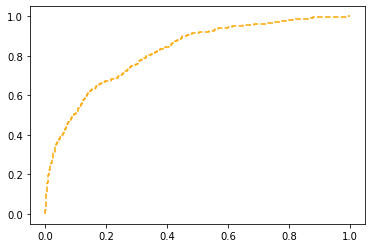

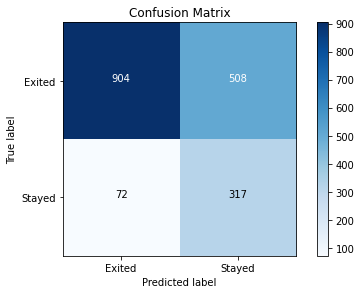

In [126]:
logiRegr(X_train_SMOTE_scaled,y_train_SMOTE ,X_test_scaled,y_test)

### without SMOTE

In [ ]:
logiRegr(X_train_scaled,y_train,X_test_scaled,y_test)

### AUC

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 10)
# knn.fit(X_train,y_train)


logreg = LogisticRegression(random_state=1,**kwargs)
# Fit to training data.
logreg.fit(X_train, y_train)



y_scores = logiRegr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show();




   logreg = LogisticRegression(random_state=1,**kwargs)
    # Fit to training data.
    logreg.fit(X_train, y_train)

    # Examine coefficients
    pprint.pprint(list(zip(X_train.columns,logreg.coef_[0])))
    # Class predictions (not predicted probabilities)
    y_pred_class = logreg.predict(X_test)
    
    # plot confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred_class))
    #print precision, recall, accuracy, F1
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))
    print('Recall: ', metrics.recall_score(y_test, y_pred_class))
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # Confusion matrix
    plot_cm(y_test,y_pred_class)

## Support Vector Machines

In [ ]:
def svmClass(X_train, y_train, X_test, y_test, **kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    svm = SVC(random_state=1,**kwargs)
    # Fit to training data.
    svm.fit(X_train, y_train)

    # Examine coefficients
    # pprint.pprint(list(zip(X_train.columns,svm.feature_importances_)))

    # feature_names = X_train.columns
    # f_importances = (svm.coef_,feature_names)

    # imp = coef
    # imp,names = zip(*sorted(zip(imp,names)))
    # plt.barh(range(len(names)), imp, align='center')
    # plt.yticks(range(len(names)), names)
    # plt.show()

    # Class predictions
    y_pred_class = svm.predict(X_test)
    # plot confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred_class))

    # Scoring metrics
    #print precision, recall, accuracy, F1
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))
    print('Recall: ', metrics.recall_score(y_test, y_pred_class))
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # Confusion matrix
    plot_cm(y_test,y_pred_class)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

### with SMOTE

In [ ]:
svmClass(X_train_SMOTE_scaled,y_train_SMOTE ,X_test_scaled,y_test)

In [ ]:
feature_names = X_train_SMOTE_scaled.columns
svm = SVC(kernel='linear')
svm.fit(X_train_SMOTE_scaled, y_train_SMOTE)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), feature_names, top=10)

### without SMOTE

In [ ]:
svmClass(X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
feature_names = X_train_scaled.columns
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), feature_names, top=10)

## Random Forest

In [ ]:
def randomForest(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    rf = RandomForestClassifier(random_state=1, **kwargs) 
    # Fit to training data.
    rf.fit(X_train,y_train)

    # Examine coefficients
    pprint.pprint(list(zip(X_train.columns,rf.feature_importances_)))

    # Class predictions
    y_pred_class = rf.predict(X_test)

    # Scoring metrics
    # plot confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred_class))
    #print precision, recall, accuracy, F1
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))
    print('Recall: ', metrics.recall_score(y_test, y_pred_class))
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # Confusion matrix
    plot_cm(y_test,y_pred_class)

### with SMOTE

In [ ]:
randomForest(X_train_SMOTE_scaled,y_train_SMOTE,X_test_scaled,y_test)

### without SMOTE

In [ ]:
randomForest(X_train_scaled,y_train,X_test_scaled,y_test)

## XG Boost

In [151]:
def xgbClass(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    xg = xgb.XGBClassifier(seed=1,**kwargs)
    # Fit to training data.
    xg.fit(X_train,y_train)
    
    # Examine coefficients
    pprint.pprint(list(zip(X_train.columns,xg.feature_importances_)))

    # Class predictions
    y_pred_class = xg.predict(X_test)

    # Scoring metrics
    # plot confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred_class))
    #print precision, recall, accuracy, F1
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))
    print('Recall: ', metrics.recall_score(y_test, y_pred_class))
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # Confusion matrix
    plot_cm(y_test,y_pred_class)

### with SMOTE

[('CreditScore', 0.0033685942),
 ('Geography_France', 0.035941947),
 ('Geography_Spain', 0.019099263),
 ('Geography_Germany', 0.04596881),
 ('Gender_Female', 0.08188538),
 ('Gender_Male', 0.0),
 ('Age', 0.013181261),
 ('Tenure', 0.007129712),
 ('Balance', 0.008973302),
 ('NumOfProducts', 0.07632403),
 ('HasCrCard', 0.017251177),
 ('IsActiveMember', 0.120474756),
 ('EstimatedSalary', 0.0029540285),
 ('quantile_Age_twenties', 0.06480814),
 ('quantile_Age_youngThirties', 0.02491735),
 ('quantile_Age_highThirties', 0.03390154),
 ('quantile_Age_middleAged', 0.25803807),
 ('quantile_Age_elderly', 0.18578254)]
Confusion Matrix:
[[   0 1412]
 [   0  389]]
Precision:  0.21599111604664076
Recall:  1.0
Classification Accuracy:  0.21599111604664076
Test F1 score:  0.3552511415525114


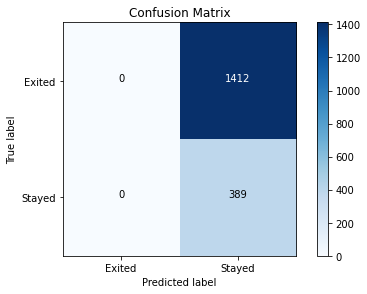

In [152]:
xgbClass(X_train_SMOTE_scaled,y_train_SMOTE,X_test_scaled,y_test)

### without SMOTE

[('CreditScore', 0.02402658),
 ('Geography_France', 0.031757094),
 ('Geography_Spain', 0.0),
 ('Geography_Germany', 0.11693254),
 ('Gender_Female', 0.06776987),
 ('Gender_Male', 0.0),
 ('Age', 0.20159186),
 ('Tenure', 0.024237232),
 ('Balance', 0.06018245),
 ('NumOfProducts', 0.21413451),
 ('HasCrCard', 0.014035075),
 ('IsActiveMember', 0.22455221),
 ('EstimatedSalary', 0.020780604),
 ('quantile_Age_twenties', 0.0),
 ('quantile_Age_youngThirties', 0.0),
 ('quantile_Age_highThirties', 0.0),
 ('quantile_Age_middleAged', 0.0),
 ('quantile_Age_elderly', 0.0)]
Confusion Matrix:
[[1380   32]
 [ 216  173]]
Precision:  0.8439024390243902
Recall:  0.44473007712082263
Classification Accuracy:  0.8622987229317046
Test F1 score:  0.5824915824915825


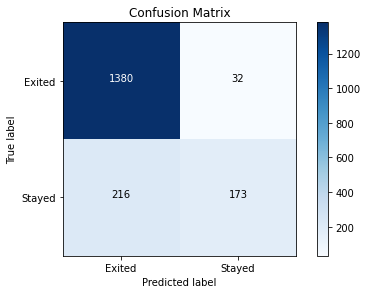

In [153]:
xgbClass(X_train_scaled,y_train,X_test_scaled,y_test)

# Hyperparameter Tuning of our Classifiers

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def grid_tune(estimator, params, cv, scoring, X_train, y_train, X_test, y_test):
    #create the instance of GridSearchCV
    gs = GridSearchCV(estimator, params, cv=cv, scoring=scoring)
 
    #fit the Gridsearch to our data
    gs.fit(X_train,y_train)
    # examine the best model
    print('Training Best Score: ', gs.best_score_, '\n')
    print('Training Best Params:  \n', gs.best_params_, '\n\n')
    print('Training Best Estimator:  \n', gs.best_estimator_, '\n\n')
    
    return gs.best_params_

## Logistic Regression Hyperparameters

In [ ]:
# random_state for reproducibility
logreg = LogisticRegression(random_state=1)
solver = {'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}
log_solver = grid_tune(logreg,solver,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
log_params = {'penalty': ['l1','l2'],
              'C': [0.001,0.01,0.1,0.5,1.0],
              'class_weight': ['balanced',None]
             }

In [ ]:
log_best = grid_tune(logreg,log_params,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

## SVM Hyperparamaters

In [ ]:
svm = SVC(random_state=1)
svm_kernel = {'kernel': ['linear','poly','rbf','sigmoid']}
svm_solver = grid_tune(svm,svm_kernel,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
## !!!! ATTENTION, THIS WILL RUN FOR A LONG TIME !!!!!
svm_params = {'C': [0.001,0.01,0.1,0.5,1.0],
             'gamma': [0.1, 1, 10, 100],
             'class_weight': ['balanced', None]}
svm_best = grid_tune(svm,svm_params,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

## Random Forest Hyperparameters

In [ ]:
def grid_tune(estimator, params, cv, scoring, X_train, y_train, X_test, y_test):
    #create the instance of GridSearchCV
    gs = GridSearchCV(estimator, params, cv=cv, scoring=scoring,n_jobs=-1) 
    #fit the Gridsearch to our data
    gs.fit(X_train,y_train)
    # examine the best model
    print('Training Best Score: ', gs.best_score_, '\n')
    print('Training Best Params:  \n', gs.best_params_, '\n\n')
    print('Training Best Estimator:  \n', gs.best_estimator_, '\n\n')
    
    return gs.best_params_

In [ ]:
# Instantiate random forest model.
rf = RandomForestClassifier(random_state=1)
# Set range for estimators.
rf_est_params = {'n_estimators': np.arange(10,300,10)}
# Run through grid search, optimizing for F1 score. 
rf_est = grid_tune(rf,rf_est_params,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
rf_split_params = {'min_samples_split': np.arange(2,50,4),
                   'n_estimators': [120]}
rf_split = grid_tune(rf,rf_split_params,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
rf_depth_params = {'max_depth': np.arange(10,60,1),
                   'min_samples_split': [30],
                   'n_estimators': [120]}
rf_depth = grid_tune(rf,rf_depth_params,5,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def random_grid(estimator, params, cv, n_iter, scoring, X_train, y_train, X_test, y_test):
    #create the instance of GridSearchCV
    rs = RandomizedSearchCV(estimator, params, cv=cv, n_iter=n_iter, scoring=scoring,n_jobs=-1) 
    #fit the RandomizedSearch to our data
    rs.fit(X_train,y_train)
    # examine the best model
    print('Training Best Score: ', rs.best_score_, '\n')
    print('Training Best Params:  \n', rs.best_params_, '\n\n')
    print('Training Best Estimator:  \n', rs.best_estimator_, '\n\n')
    
    return rs.best_params_

In [ ]:
rf_random = {'max_depth': np.arange(10,60,1),
             'min_samples_split': np.arange(2,50,4),
             'n_estimators': np.arange(10,300,10)}
rf_rg = random_grid(rf,rf_random,5,30,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

##XG Boost Hyperparamater Tuning

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
def random_grid(estimator, params, cv, n_iter, scoring, X_train, y_train, X_test, y_test):
    #create the instance of GridSearchCV
    rs = RandomizedSearchCV(estimator, params, cv=cv, n_iter=n_iter, scoring=scoring,n_jobs=-1) 
    #fit the RandomizedSearch to our data
    rs.fit(X_train,y_train)
    # examine the best model
    print('Training Best Score: ', rs.best_score_, '\n')
    print('Training Best Params:  \n', rs.best_params_, '\n\n')
    print('Training Best Estimator:  \n', rs.best_estimator_, '\n\n')
    
    return rs.best_params_

In [154]:
xg = xgb.XGBClassifier(seed=1)
xg_random = {'eta': [0.01,0.05,0.1,0.2,0.3],
             'min_depth': np.arange(3,10,1),
             'min_child_weight': np.arange(1,6,1),
             'scale_pos_weight': [0.5,1,2],
             'objective': ['binary:logistic', 'binary:logitraw','binary:hinge']
            }
xg_rg = random_grid(xg,xg_random,5,60,'precision',X_train_scaled,y_train,X_test_scaled,y_test)

Training Best Score:  0.9129428385070468 

Training Best Params:  
 {'scale_pos_weight': 0.5, 'objective': 'binary:logitraw', 'min_depth': 7, 'min_child_weight': 1, 'eta': 0.05} 


Training Best Estimator:  
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_depth=7, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logitraw',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.5,
              seed=1, silent=None, subsample=1, verbosity=1) 




In [156]:
print(xg_rg)

{'scale_pos_weight': 0.5, 'objective': 'binary:logitraw', 'min_depth': 7, 'min_child_weight': 1, 'eta': 0.05}


##Save the Best Model

In [144]:
import joblib
best_model = 'best_model.sav'
joblib.dump(xg_rg,best_model)

['best_model.sav']

# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV, SelectKBest, f_classif

In [ ]:
def rfe_cv(estimator,step,cv,scoring,X_train,y_train):
    # Instantiate Recursive Feature Elimination object
    selector = RFECV(estimator=estimator, step=step, cv=cv, scoring=scoring)
    # Fit to training data.
    selector.fit(X_train,y_train)
    # Print and return selected and removed columns. 
    selected_columns = X_train.columns[selector.support_]
    removed_columns = X_train.columns[~selector.support_]
    print('*'*20+'SELECTED'+'*'*19)
    pprint.pprint(list(selected_columns))
    print('\n'+'*'*20+'REMOVED'+'*'*20)
    pprint.pprint(list(removed_columns))
    return selected_columns

## Logistic Regression Feature Selection

In [ ]:
# Instantiate the estimator with best params.
logreg_final = LogisticRegression(C=0.1, class_weight='balanced', penalty='l2')
# Run RFECV. 
log_selector = rfe_cv(logreg_final,1,5,'f1', X_train_scaled, y_train)

*SELECTED*
['Geography_Germany',
 'Gender_Female',
 'Gender_Male',
 'Age',
 'Balance',
 'IsActiveMember',
 'quantile_Age_twenties',
 'quantile_Age_youngThirties',
 'quantile_Age_middleAged',
 'quantile_Age_elderly']

*REMOVED*

['CreditScore',
 'Geography_France',
 'Geography_Spain',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'EstimatedSalary',
 'quantile_Age_highThirties']

In [ ]:
# create a new data set with the selected variables only
X_logReg = url[log_selector]
y_logReg = url['Exited']

In [ ]:
X_logReg_train, X_logReg_test, y_logReg_train, y_logReg_test = train_test_split(X_logReg, y_logReg, random_state=1)
logReg_scaler = StandardScaler()  
logReg_scaler.fit(X_logReg_train)
X_logReg_train_scaled = pd.DataFrame(logReg_scaler.transform(X_logReg_train), columns=X_logReg_train.columns) 
X_logReg_test_scaled = pd.DataFrame(logReg_scaler.transform(X_logReg_test), columns=X_logReg_test.columns)

In [ ]:
logiRegr(X_logReg_train, y_logReg_train, X_logReg_test, y_logReg_test,**log_best)

**ok, this looks decidedly weird since there is no precision score anymore. something is off, probably I am using wrong data sets**

## XG Boost Feature Selection

In [ ]:
# Model with best params.
xg_final = xgb.XGBClassifier(scale_pos_weight=2, objective='binary:logistic', min_depth= 5, min_child_weight=1, eta=0.3)

# Run RFECV. 
xg_selector = rfe_cv(xg_final,1,5,'f1', X_train_scaled, y_train)

********************SELECTED*******************

['Geography_France',
 'Geography_Germany',
 'Gender_Female',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember']

********************REMOVED********************

['CreditScore',
 'Geography_Spain',
 'Gender_Male',
 'Tenure',
 'HasCrCard',
 'EstimatedSalary',
 'quantile_Age_twenties',
 'quantile_Age_youngThirties',
 'quantile_Age_highThirties',
 'quantile_Age_middleAged',
 'quantile_Age_elderly']

In [ ]:
# Make new everything.
X_xg = df[xg_selector]
y_xg = df['Exited']
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, random_state=1)
xg_scaler = StandardScaler()  
xg_scaler.fit(X_xg_train)
X_xg_train_scaled = pd.DataFrame(xg_scaler.transform(X_xg_train), columns=X_xg_train.columns) 
X_xg_test_scaled = pd.DataFrame(xg_scaler.transform(X_xg_test), columns=X_xg_test.columns)
xgbClass(X_xg_train_scaled,y_xg_train,X_xg_test_scaled,y_xg_test,**xg_rg)

*wow, that is impressive: precision of 91.1%*

## Random Forest Feature Selection

In [ ]:
rf_final = RandomForestClassifier(n_estimators= 270, min_samples_split= 6, max_depth= 41)
rf_selector = rfe_cv(rf_final,1,5,'f1', X_train_scaled, y_train)

********************SELECTED*******************

['CreditScore',
 'Geography_Germany',
 'Gender_Female',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'quantile_Age_elderly']

********************REMOVED********************

['Geography_France',
 'Geography_Spain',
 'Gender_Male',
 'HasCrCard',
 'quantile_Age_twenties',
 'quantile_Age_youngThirties',
 'quantile_Age_highThirties',
 'quantile_Age_middleAged']

In [ ]:
X_rf = df[rf_selector]
y_rf = df['Exited']
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, random_state=1)
rf_scaler = StandardScaler()  
rf_scaler.fit(X_rf_train)
X_rf_train_scaled = pd.DataFrame(rf_scaler.transform(X_rf_train), columns=X_rf_train.columns) 
X_rf_test_scaled = pd.DataFrame(rf_scaler.transform(X_rf_test), columns=X_rf_test.columns)
randomForest(X_rf_train,y_rf_train,X_rf_test,y_rf_test,**rf_rg)

## SVM Feature Selection

In [ ]:
# Fit using f_classif. 
svm_features= SelectKBest(f_classif, k=8).fit(X_train_scaled,y_train)
# Gets the best features.  
svm_selected = svm_features.get_support()
# Adds corresponding column names and prints. 
svm_selected_features = [ f for i,f in enumerate(X_train_scaled.columns) if svm_selected[i]]
pprint.pprint('Precision_classif selected {} features: {}.'.format(svm_selected.sum(),
   svm_selected_features))

**"Precision_classif selected 8 features:**

['Geography_Germany', 'Gender_Male', "
 "'Age', 'Balance', 'IsActiveMember', 'quantile_Age_twenties', "
 *
 "'quantile_Age_youngThirties', 'quantile_Age_elderly'].")

In [ ]:
X_svm_train = X_train_scaled[svm_selected_features]
X_svm_test = X_test_scaled[svm_selected_features]

In [ ]:
svmClass(X_svm_train, y_train, X_svm_test, y_test, **svm_best)

*Precision of 72.8% is not overwhelming*

# Load Best Model and run on unseen data

#load production data

In [128]:
ProdData = pd.read_csv('https://raw.githubusercontent.com/rkloe5813/data-science-projects/main/datasets/projectUnseenData.csv')

In [130]:
ProdData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,9001,15723217,Cremonesi,616,France,Male,37,9,0.00,1,1,0,111312.96
1,9002,15733111,Yeh,688,Spain,Male,32,6,124179.30,1,1,1,138759.15
2,9003,15610727,Ch'in,605,France,Male,36,7,128829.25,1,1,0,190588.59
3,9004,15792720,Martinez,676,France,Male,33,6,171490.78,1,0,0,79099.64
4,9005,15723153,Wearing,708,Spain,Male,33,3,0.00,2,1,0,138613.21


In [131]:
ProdData.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [132]:
ProdData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,616,France,Male,37,9,0.00,1,1,0,111312.96
1,688,Spain,Male,32,6,124179.30,1,1,1,138759.15
2,605,France,Male,36,7,128829.25,1,1,0,190588.59
3,676,France,Male,33,6,171490.78,1,0,0,79099.64
4,708,Spain,Male,33,3,0.00,2,1,0,138613.21


In [133]:
# create labels for the bins
labels = ['twenties', 'youngThirties', 'highThirties', 'middleAged','elderly']
ProdData['quantile_Age'] = pd.qcut(ProdData['Age'], q=5, precision=0, labels = labels)
# url['bin_qcut'] = url.qcut(url['Age'], q=3, precision=1, labels=labels)
ProdData['quantile_Age'].value_counts(sort=False)

twenties         201
youngThirties    218
highThirties     185
middleAged       213
elderly          183
Name: quantile_Age, dtype: int64

In [134]:
import category_encoders as ce

#Label encoding
cat_cols = ['Geography', 'Gender','quantile_Age'] 

# ordinal_encoder = ce.OrdinalEncoder(cols=cat_cols)
cat_encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True, return_df=True)

ProdData = cat_encoder.fit_transform(ProdData)

In [135]:
ProdData.head()

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Male,Gender_Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,quantile_Age_twenties,quantile_Age_youngThirties,quantile_Age_highThirties,quantile_Age_middleAged,quantile_Age_elderly
0,616,1,0,0,1,0,37,9,0.00,1,1,0,111312.96,0,0,1,0,0
1,688,0,1,0,1,0,32,6,124179.30,1,1,1,138759.15,0,1,0,0,0
2,605,1,0,0,1,0,36,7,128829.25,1,1,0,190588.59,0,0,1,0,0
3,676,1,0,0,1,0,33,6,171490.78,1,0,0,79099.64,0,1,0,0,0
4,708,0,1,0,1,0,33,3,0.00,2,1,0,138613.21,0,1,0,0,0


In [136]:
scaler = StandardScaler()  
scaler.fit(ProdData)
ProdData_scaled = pd.DataFrame(scaler.transform(ProdData), columns=ProdData.columns)

In [137]:
ProdData_scaled

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Male,Gender_Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,quantile_Age_twenties,quantile_Age_youngThirties,quantile_Age_highThirties,quantile_Age_middleAged,quantile_Age_elderly
0,-0.400355,0.968496,-0.537271,-0.592749,0.886405,-0.886405,-0.171869,1.339805,-1.244106,-0.894963,0.601995,-1.059784,0.212184,-0.501562,-0.527989,2.098906,-0.520238,-0.473276
1,0.356500,-1.032529,1.861259,-0.592749,0.886405,-0.886405,-0.635630,0.316011,0.761863,-0.894963,0.601995,0.943588,0.688601,-0.501562,1.893979,-0.476439,-0.520238,-0.473276
2,-0.515986,0.968496,-0.537271,-0.592749,0.886405,-0.886405,-0.264621,0.657276,0.836977,-0.894963,0.601995,-1.059784,1.588266,-0.501562,-0.527989,2.098906,-0.520238,-0.473276
3,0.230357,0.968496,-0.537271,-0.592749,0.886405,-0.886405,-0.542878,0.316011,1.526123,-0.894963,-1.661144,-1.059784,-0.346981,-0.501562,1.893979,-0.476439,-0.520238,-0.473276
4,0.566737,-1.032529,1.861259,-0.592749,0.886405,-0.886405,-0.542878,-0.707783,-1.244106,0.836107,0.601995,-1.059784,0.686067,-0.501562,1.893979,-0.476439,-0.520238,-0.473276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.228986,0.968496,-0.537271,-0.592749,0.886405,-0.886405,0.013635,-0.025254,-1.244106,0.836107,0.601995,-1.059784,-0.048923,-0.501562,-0.527989,2.098906,-0.520238,-0.473276
996,-1.451543,0.968496,-0.537271,-0.592749,0.886405,-0.886405,-0.357374,1.681070,-0.317368,-0.894963,0.601995,0.943588,0.045316,-0.501562,1.893979,-0.476439,-0.520238,-0.473276
997,0.577249,0.968496,-0.537271,-0.592749,-1.128152,1.128152,-0.264621,0.657276,-1.244106,-0.894963,-1.661144,0.943588,-0.989479,-0.501562,-0.527989,2.098906,-0.520238,-0.473276
998,1.239498,-1.032529,-0.537271,1.687055,0.886405,-0.886405,0.291891,-0.707783,-0.031354,0.836107,0.601995,-1.059784,-0.107631,-0.501562,-0.527989,-0.476439,1.922196,-0.473276


In [147]:
xgBest = xgb.XGBClassifier(max_depth=3, 
                  learning_rate=0.1, 
                  n_estimators=100, 
                  verbosity=1, 
                  silent=None, 
                  objective='binary:logitraw', 
                  booster='gbtree', 
                  n_jobs=1, 
                  nthread=None, 
                  gamma=0, 
                  min_child_weight=2, 
                  max_delta_step=0, 
                  subsample=1, 
                  colsample_bytree=1, 
                  colsample_bylevel=1, 
                  colsample_bynode=1, 
                  reg_alpha=0, 
                  reg_lambda=1, 
                  scale_pos_weight=0.5, 
                  base_score=0.5, 
                  random_state=0, 
                  seed=1, 
                  missing=None)

In [157]:
xgBest.fit(X_train_scaled,y_train)
yProdPred = xgBest.predict(ProdData_scaled)

ValueError: ignored

In [158]:
X_train_scaled.columns

Index(['CreditScore', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'quantile_Age_twenties',
       'quantile_Age_youngThirties', 'quantile_Age_highThirties',
       'quantile_Age_middleAged', 'quantile_Age_elderly'],
      dtype='object')

In [159]:
ProdData_scaled.columns

Index(['CreditScore', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Male', 'Gender_Female', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'quantile_Age_twenties',
       'quantile_Age_youngThirties', 'quantile_Age_highThirties',
       'quantile_Age_middleAged', 'quantile_Age_elderly'],
      dtype='object')

In [160]:
ProdData_scaled = ProdData_scaled[['CreditScore', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'quantile_Age_twenties',
       'quantile_Age_youngThirties', 'quantile_Age_highThirties',
       'quantile_Age_middleAged', 'quantile_Age_elderly']]

In [161]:
ProdData_scaled.columns

Index(['CreditScore', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'quantile_Age_twenties',
       'quantile_Age_youngThirties', 'quantile_Age_highThirties',
       'quantile_Age_middleAged', 'quantile_Age_elderly'],
      dtype='object')

In [162]:
yProdPred = xgBest.predict(ProdData_scaled)

# Predictions

In [164]:
yProdPred = pd.DataFrame(yProdPred, columns = ['Exited'])
yProdPred

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [165]:
ProdData = pd.read_csv('https://raw.githubusercontent.com/rkloe5813/data-science-projects/main/datasets/projectUnseenData.csv')

In [168]:
ProdPrediction = pd.merge(left = ProdData, left_index = True,
                          right = yProdPred, right_index = True,
                          how = 'inner')

In [169]:
ProdPrediction

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9001,15723217,Cremonesi,616,France,Male,37,9,0.00,1,1,0,111312.96,0
1,9002,15733111,Yeh,688,Spain,Male,32,6,124179.30,1,1,1,138759.15,0
2,9003,15610727,Ch'in,605,France,Male,36,7,128829.25,1,1,0,190588.59,0
3,9004,15792720,Martinez,676,France,Male,33,6,171490.78,1,0,0,79099.64,0
4,9005,15723153,Wearing,708,Spain,Male,33,3,0.00,2,1,0,138613.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,0
998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0


In [170]:
print('\nDistribution of target variable "Exited" in Production Prediction Set :')
print(ProdPrediction.Exited.value_counts()/ProdPrediction.Exited.count());


Distribution of target variable "Exited" in Production Prediction Set :
0    0.948
1    0.052
Name: Exited, dtype: float64


# Save the Prediction to CSV (download)

In [179]:
ProdPrediction.to_csv(r'ProdPrediction.csv')

# AUC of best model

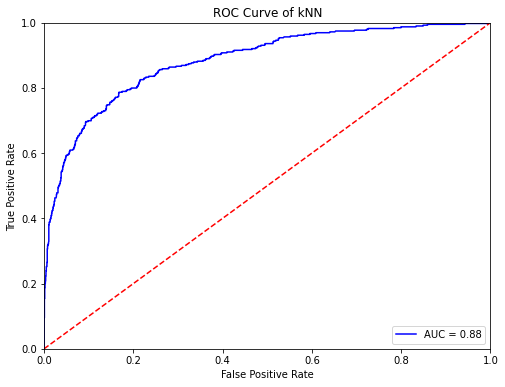

In [173]:

xgBest.fit(X_train_scaled,y_train)
y_scores = xgBest.predict_proba(X_test_scaled)


# knn = KNeighborsClassifier(n_neighbors = 10)
# knn.fit(X_train,y_train)

# y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(8,6))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show();

#### save the ensuing AUC as a png

In [174]:
fig.savefig('XGBoost_roc_curve.png')